***********************Print Diabetes Data************************
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies      

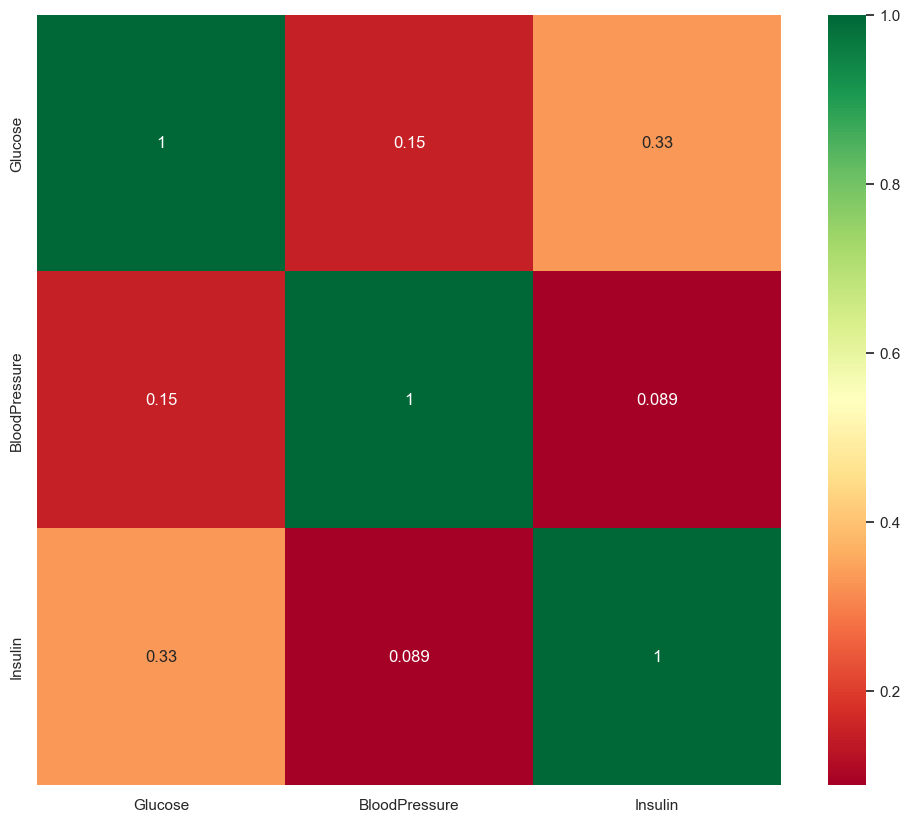

***********************Normalization************************
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.862287      -0.032746       0.558557       NaN  0.165097   
1    -0.844885 -1.202229      -0.517645      -0.014657       NaN -0.846404   
2     1.233880  2.009241      -0.679278            NaN       NaN -1.323254   
3    -0.844885 -1.071148      -0.517645      -0.587871 -0.518847 -0.629654   
4    -1.141852  0.501816      -2.618874       0.558557  0.104968  1.537847   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  
***********************Feature Selection************************
***********************Split Data into Train and Test************************
***********************Fill Missing Values with Imputer************************
*******

In [8]:

#BACK END CODE


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()


from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

diabetes_df = pd.read_csv('diabetes.csv')

print("***********************Print Diabetes Data************************")

print(diabetes_df.head())

diabetes_df.columns

diabetes_df.info()

diabetes_df.describe()

diabetes_df.isnull().head(10)

diabetes_df.isnull().sum()

diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


print("***********************Missing Values Count************************")
print(diabetes_df_copy.isnull().sum())


print("***********************Missing Values count in each column************************")

print("Total number of rows: {0}", format(len(diabetes_df)))
print("Number of rows missing Pregnancies: {0}",
      format(len(diabetes_df.loc[diabetes_df['Pregnancies']==0])))
print("Number of rows missing Glucose: {0}"
      , format(len(diabetes_df.loc[diabetes_df['Glucose']==0])))
print("Number of rows missing BloodPressure: {0}",
      format(len(diabetes_df.loc[diabetes_df['BloodPressure']==0])))
print("Number of rows missing SkinThickness: {0}",
      format(len(diabetes_df.loc[diabetes_df['SkinThickness']==0])))
print("Number of rows missing Insulin: {0}",
      format(len(diabetes_df.loc[diabetes_df['Insulin']==0])))
print("Number of rows missing BMI: {0}",
      format(len(diabetes_df.loc[diabetes_df['BMI']==0])))
print("Number of rows missing DiabetesPedigreeFunction: {0}",
      format(len(diabetes_df.loc[diabetes_df['DiabetesPedigreeFunction']==0])))
print("Number of rows missing Age: {0}", format(len(diabetes_df.loc[diabetes_df['Age']==0])))

"""
print("***********************Correlation Matrix of whole data************************")

plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')
plt.show()

"""
#Since I am only Interested in these three columns so use three columns for correlation matrix
print("***********************Correlation Matrix for three columns************************")

plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes_df[['Glucose','BloodPressure','Insulin']].corr(), annot=True,cmap ='RdYlGn')
plt.show()

diabetes_df_copy.head()

print("***********************Normalization************************")

sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
print(X.head())


y = diabetes_df_copy.Outcome

y

print("***********************Feature Selection************************")

X = diabetes_df[['Insulin',"BloodPressure","Glucose"]]
y = diabetes_df['Outcome']


print("***********************Split Data into Train and Test************************")

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=7)



print("***********************Fill Missing Values with Imputer************************")


from sklearn.impute import SimpleImputer
import numpy as np

fill_values = SimpleImputer(missing_values=0, strategy='mean')
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)


print("***********************Train with Random Forest Classifier Model************************")

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)


rfc_train = rfc.predict(X_train)

print("***********************Accuarcy of Random Forest Model for train data************************")

from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

predictions = rfc.predict(X_test)

print("***********************Accuarcy of Random Forest Model for test data************************")

from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

from sklearn.metrics import classification_report, confusion_matrix

print("***********************Print Confusion Matrix of Random Forest Model************************")

print(confusion_matrix(y_test, predictions))


print("***********************Print Classification Report of Random Forest Model************************")

print(classification_report(y_test,predictions))


print("***********************Train with Decision Tree Classifier Model************************")

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)

print("***********************Accuarcy of Decision Tree Model for test data************************")

from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

from sklearn.metrics import classification_report, confusion_matrix

print("***********************Print Confusion Matrix of Decision Tree Model************************")

print(confusion_matrix(y_test, predictions))

print("***********************Print Classification Report of Decision Tree Model************************")


print(classification_report(y_test,predictions))


print("***********************Save the Random Forest Model as it is giving more accuracy************************")

import pickle
 
saved_model = pickle.dumps(rfc)

rfc_from_pickle = pickle.loads(saved_model)
 
rfc_from_pickle.predict(X_test)

diabetes_df.head()

diabetes_df.tail()

rfc.predict([[0,137,40]])

print("***********************User Interface Code************************")


import tkinter as tk
root = tk.Tk()
root.geometry('500x600')
root.title('Diabetes Prediction App')

main_frame = tk.Frame(root)

page_1 = tk.Frame(main_frame)
page_1_lb = tk.Label(page_1, text='Start Page', font=('Bold', 20))
page_1_lb.pack()

page_1.pack(pady=100)

page_2 = tk.Frame(main_frame)
page_2_lb = tk.Label(page_2, text='Insulin Levels in mcU/ml', font=('Bold', 20))
entrybox2=tk.Entry(page_2)
page_2_lb.pack()
entrybox2.pack()

page_3 = tk.Frame(main_frame)
page_3_lb = tk.Label(page_3, text='Glucose Levels in mg/dL', font=('Bold', 20))
entrybox3=tk.Entry(page_3)
page_3_lb.pack()
entrybox3.pack()

page_4 = tk.Frame(main_frame)
page_4_lb = tk.Label(page_4, text='Blood Pressure mmHg', font=('Bold', 20))
entrybox4=tk.Entry(page_4)
page_4_lb.pack()
entrybox4.pack()

page_5 = tk.Frame(main_frame)
page_5_lb = tk.Label(page_5, text='Results', font=('Bold', 20))
page_5_lb.pack()


def classify():
    Insulin=float(entrybox2.get())
    Glucose=int(entrybox3.get())
    Blood_Pressure=int(entrybox4.get())
    result=rfc.predict([[Insulin,Blood_Pressure,Glucose]])
    print(result)
    # add if statement for it
    if result == [1]:
        tk.Label(page_5,text="I am extrmely sorry but I think you have diabetes", font=("Bold", 10)).pack(side=tk.BOTTOM, pady=50)
        if Insulin < 10:
            tk.Label(page_5,text="You may have type 1 diabetes because of low insulin levels", font=("Bold", 10)).pack(side=tk.LEFT, pady=55)
        else:
            tk.Label(page_5,text="You have type 2 diabetes", font=("Bold", 10)).pack(side=tk.LEFT, pady=60)
            if Glucose > 125:
                tk.Label(page_5,text="You have too high glucose levels and need a stable diet along with excercise", font=("Bold", 10)).pack(side=tk.LEFT, pady=65)
            elif BloodPressure > 120:
                tk.Label(page_5,text="You have too high blood pressure and need to stress less, try meditating", font=("Bold", 10)).pack(side=tk.LEFT, pady=70)
    if result ==[0]:
        tk.Label(page_5,text="You don't have diabetes", font=("Bold", 10)).pack(side=tk.BOTTOM, pady=50)
    #page_5_lb.pack()
main_frame.pack(fill=tk.BOTH, expand=True)


pages = [page_1, page_2, page_3, page_4, page_5]
count = 0

def move_next_page():
    global count

    if not count > len(pages) - 2:

     for p in pages:
         p.pack_forget()

    count += 1
    page = pages[count]
    page.pack(pady=100)

def move_back_page():
        global count

        if not count == 0:

            for p in pages:
                p.pack_forget()

        count -= 1
        page = pages[count]
        page.pack(pady=100)



bottom_frame = tk.Frame(root)
back_btn = tk.Button(bottom_frame, text='Back',
                     font=('Bold', 12),
                     bg='#1877f2', fg='black', width=8,
                     command=move_back_page)
back_btn.pack(side=tk.LEFT, padx=10)


next_btn = tk.Button(bottom_frame, text='Next',
                     font=('Bold', 12),
                     bg='#1877f2', fg='black', width=8,
                     command=move_next_page)
next_btn.pack(side=tk.RIGHT, padx=10)
next_btn = tk.Button(page_5, text='Submit',
                     font=('Bold', 12),
                     bg='#1877f2', fg='black', width=8,
                     command=classify)
next_btn.pack(side=tk.BOTTOM, padx=10)

bottom_frame.pack(side=tk.BOTTOM, pady=10)

root.mainloop()